# Making a simple widget-based UI with ipywidgets.interactive_output

This is a guide-by-example to making simple user interfaces (UIs) for Jupyter notebook using the widgets provided by ipywidgets. In particular we use `ipywidgets.interactive_output`.  There are both simpler and more elaborate ways to use ipywidgets; this is a happy medium.

Google "ipywidgets interact" for links to more information about widget types and other options for widgets.

v1 by Dick Furnstahl (furnstahl.1@osu.edu)

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## First pass: only minimal controls

### 1. Import ipywidgets and Ipython.display

In [2]:
# For convenience, we'll import explicitly the widgets we might use 
import ipywidgets as widgets
from ipywidgets import HBox, VBox, Layout, Tab, Label, Checkbox
from ipywidgets import FloatSlider, IntSlider, Play, Dropdown, HTMLMath 

from IPython.display import display

### 2. Create a function with all inputs to generate the output figure(s).

In [3]:
# This is a proxy for whatever calculations we need to do for the figure. 
def my_function(t, A=1., omega=1., phi=0.):
    """A sine function with adjustable amplitude, frequency, and phase.
    """
    return A * np.sin(omega * t + phi)
    

def update_plot(omega=1.0):
    """
    Update the plot, which includes a call to a function.
    Note that the entire plot is redrawn here.
    """
    t_min = 0.
    t_max = 2. * np.pi
    num_t = 200
    t_pts = np.linspace(t_min, t_max, num_t)
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    line, = ax.plot(t_pts, my_function(t_pts, omega=omega),
                    lw=2, color='blue')
    ax.set_xlabel(r'$t$')
    ax.set_ylabel(r'$f(t)$')
    

### 3. Make a widget for each value you want to control.

In [4]:
# We append _w to widget objects by convention.
omega_w = FloatSlider(value=1.0, min=0.1, max=10., step=0.1,
                      description=r'$\omega$ :')


### 4.  Make any explicit callback functions and add .observe methods.

We won't need this on the first pass.

### 5. Set up the interactive_output function.

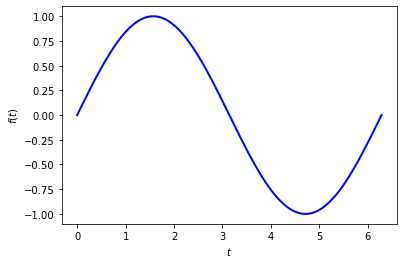

In [5]:
plot_out = widgets.interactive_output(update_plot,
                                      dict(
                                      omega=omega_w,
                                      )
                                     )

### 6. Make the layout of the widgets.

In [6]:
UI_box = VBox([omega_w, plot_out])

### 7. Release the Kraken!

In [7]:
display(UI_box)   

Try moving the slider.  Note how the figure updates while you are still moving the slider -- we'll suppress this in the second pass with `continuous_update = False`.

## Second pass: More elaborate controls and options

### 1. Import ipywidgets and Ipython.display

In [8]:
# Import explicitly the widgets we might use (add more as needed!) 
import ipywidgets as widgets
from ipywidgets import HBox, VBox, Layout, Tab, Label, Checkbox
from ipywidgets import FloatSlider, IntSlider, Play, Dropdown, HTMLMath 

from IPython.display import display

### 2. Create a function with all inputs that makes the output figure(s).

In [9]:
# This is a proxy for whatever calculations we need to do for the figure. 
def my_function(t, A=1., omega=1., phi=0.):
    """Just a sine function with adjustable amplitude, frequency, and phase
    """
    return A * np.sin(omega * t + phi)
    

def update_plot(omega=1.0, A=1., phi=0., 
                t_min=0., t_max=2.*np.pi, num_t=200,
                lw=2, color='blue'
               ):
    """
    Update the plot, which includes a call to a function.
    Note that the entire plot is redrawn here.
    Now all the parameters controlling the plot are inputs to the function.
    """
    t_pts = np.linspace(t_min, t_max, num_t)
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    line, = ax.plot(t_pts, my_function(t_pts, omega=omega, A=A, phi=phi),
                    lw=lw, color=color)
    ax.set_xlabel(r'$t$')
    ax.set_ylabel(r'$f(t)$')
    

### 3. Make a widget for each value you want to control.

In [10]:
slider_border = Layout(border='solid 1.0px')

def float_widget(value, min, max, step, description, format):
    """Makes a FloatSlider with the passed parameters and continuous_update
       set to False."""
    return FloatSlider(value=value, min=min, max=max, step=step,
                       disabled=False,
                       description=description, continuous_update=False,
                       orientation='horizontal', layout=slider_border,
                       readout=True, readout_format=format)


omega_w = float_widget(value=1.0, min=0.1, max=10., step=0.1,
                       description=r'$\omega$ :', format='.1f')

A_w = float_widget(value=1.0, min=0.1, max=10., step=0.1,
                       description=r'$A$ :', format='.1f')

phi_w = float_widget(value=0.0, min=-10., max=10., step=0.1,
                       description=r'$\phi$ :', format='.1f')

t_min_w = float_widget(value=0.0, min=0.0, max=10., step=0.1,
                       description=r'$t_{\rm min}$ :', format='.1f')

t_max_w = float_widget(value=20.0, min=5., max=50., step=0.1,
                       description=r'$t_{\rm max}$ :', format='.1f')

num_t_w = IntSlider(value=200, min=50, max=500, step=10,
                    continuous_update=False,
                    description=r'num $t$ :', layout=slider_border)



### 4.  Make any explicit callback functions and add .observe methods.

In [11]:
# Make sure that t_max is at least t_min + 1
def update_t_max(*args):
    if t_max_w.value < t_min_w.value:
        t_max_w.value = t_min_w.value + 1.     
t_max_w.observe(update_t_max, 'value')
t_min_w.observe(update_t_max, 'value')


### 5. Set up the interactive_output function.

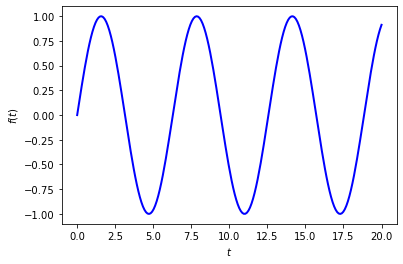

In [12]:
plot_out = widgets.interactive_output(update_plot,
                                      dict(
                                      omega=omega_w,
                                      A=A_w,
                                      phi=phi_w,
                                      t_min=t_min_w,
                                      t_max=t_max_w,
                                      num_t=num_t_w,
                                      )
                                     )

### 6. Make the layout of the widgets.

In [13]:
hbox_1 = HBox([t_min_w, t_max_w, num_t_w])
hbox_2 = HBox([omega_w, A_w, phi_w])
UI_box = VBox([hbox_1, hbox_2, plot_out])

### 7. Release the Kraken!

In [14]:
display(UI_box)   

## Third pass:  a more elaborate user interface with tabs

### 1. Import ipywidgets and Ipython.display

In [15]:
# Import explicitly the widgets we might use (add more as needed!) 
import ipywidgets as widgets
from ipywidgets import HBox, VBox, Layout, Tab, Label, Checkbox, Button
from ipywidgets import FloatSlider, IntSlider, Play, Dropdown, HTMLMath 

from IPython.display import display

### 2. Create a function with all inputs that makes the output figure(s).

In [16]:
# This is a proxy for whatever calculations we need to do for the figure. 
def my_function(t, A=1., omega=1., phi=0.):
    """Just a sine function with adjustable amplitude, frequency, and phase
    """
    return A * np.sin(omega * t + phi)
    

def update_plot(omega=1.0, A=1., phi=0., 
                t_min=0., t_max=2.*np.pi, num_t=200,
                lw=2, color='blue',
                font_size=18
               ):
    """
    Update the plot, which includes a call to a function.
    Note that the entire plot is redrawn here.
    Now all the parameters controlling the plot are inputs to the function.
    """
    t_pts = np.linspace(t_min, t_max, num_t)
    
    # Update the common font size
    plt.rcParams.update({'font.size': font_size})

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    line, = ax.plot(t_pts, my_function(t_pts, omega=omega, A=A, phi=phi),
                    lw=lw, color=color)
    ax.set_xlabel(r'$t$')
    ax.set_ylabel(r'$f(t)$')
    

### 3. Make a widget for each value you want to control.

In [17]:
slider_border = Layout(border='solid 1.0px')

def float_widget(value, min, max, step, description, format):
    """Makes a FloatSlider with the passed parameters and continuous_update
       set to False."""
    return FloatSlider(value=value, min=min, max=max, step=step,
                       disabled=False,
                       description=description, continuous_update=False,
                       orientation='horizontal', layout=slider_border,
                       readout=True, readout_format=format)


omega_w = float_widget(value=1.0, min=0.1, max=10., step=0.1,
                       description=r'$\omega$ :', format='.1f')

A_w = float_widget(value=1.0, min=0.1, max=10., step=0.1,
                       description=r'$A$ :', format='.1f')

phi_w = float_widget(value=0.0, min=-10., max=10., step=0.1,
                       description=r'$\phi$ :', format='.1f')

t_min_w = float_widget(value=0.0, min=0.0, max=10., step=0.1,
                       description=r'$t_{\rm min}$ :', format='.1f')

t_max_w = float_widget(value=20.0, min=5., max=50., step=0.1,
                       description=r'$t_{\rm max}$ :', format='.1f')

num_t_w = IntSlider(value=200, min=50, max=500, step=10,
                    continuous_update=False,
                    description=r'num $t$ :', layout=slider_border)

################### begin: text ##################
initial_text = \
    r"""
    The graph shows a sine wave specified by an amplitude, frequency,
    and phase.  All are adjustable.
    """
initial_text_w = HTMLMath(value=initial_text)

times_overview_text = \
    r"""
    Adjust the sliders to set the range in time $t$ that is plotted
    and the number of points plotted.
    """
times_overview_text_w = HTMLMath(value=times_overview_text)
################### end: text ##################


# Widgets for the set-up parameters
font_size_w = Dropdown(options=['12', '16', '18', '20', '24'], value='18',
                       description='Font size:',disabled=False,
                       continuous_update=False,layout=Layout(width='140px'))

################### begin: text for help tabs ##################
# In HTML (could move this to an external file!)
overview_text = \
   r"""<p>Here we give an example of how to display a function with 
           controls.</p>  
          <ul>
            <li>Parameters tab: find out how to specify the function.
            <li>Times tab: find out what the controls do.
            <li>Setup tab: change how the plots are made.
          </ul>      
    """ 

parameters_text = \
    r"""
    We are plotting this function:
    $$
    A \sin(\omega t + \phi)
    $$
    """

times_text = \
    r"""
    You get to decide the range of time $t$!
    """

setup_text = \
    r"""
    For now, just an adjustment to the font size used for the plot.
    """
################### end: text for help tabs ##################


# Widgets for the help section, which are HTMLMath boxes in a Tab widget
help_overview_w = HTMLMath(value=overview_text)
help_parameters_w = HTMLMath(value=parameters_text)
help_times_w = HTMLMath(value=times_text)
help_setup_w = HTMLMath(value=setup_text)


### 4.  Make any explicit callback functions and add .observe methods.

In [18]:
# Make sure that t_max is at least t_min + 1
def update_t_max(*args):
    if t_max_w.value < t_min_w.value:
        t_max_w.value = t_min_w.value + 1.     
t_max_w.observe(update_t_max, 'value')
t_min_w.observe(update_t_max, 'value')


### 5. Set up the interactive_output function.

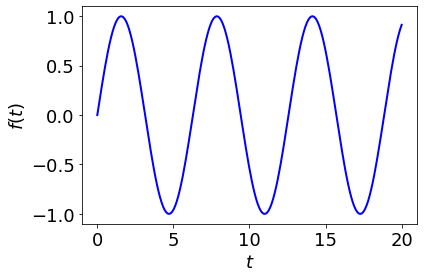

In [19]:
plot_out = widgets.interactive_output(update_plot,
                                      dict(
                                      omega=omega_w,
                                      A=A_w,
                                      phi=phi_w,
                                      t_min=t_min_w,
                                      t_max=t_max_w,
                                      num_t=num_t_w,
                                      font_size=font_size_w,
                                      )
                                     )

### 6. Make the layout of the widgets.

In [20]:

# Organize the help as Tabs (which will itself be under the Help Tab)
help_max_height = '500px'
help_tab = Tab(children=[help_overview_w, help_parameters_w, help_times_w, 
                         help_setup_w], 
               layout=Layout(width='95%', max_height=help_max_height))
help_tab.set_title(0, 'Overview')
help_tab.set_title(1, 'Parameters')
help_tab.set_title(2, 'Times')
help_tab.set_title(3, 'Set-up')

# Boxes of widgets that will go into the top-level tabs
textbox0 = HBox([initial_text_w])
hbox0 = HBox([omega_w, A_w, phi_w])
textbox1 = HBox([times_overview_text_w])
hbox1a = HBox([t_min_w, t_max_w])
hbox1b = HBox([num_t_w])
hbox2 = HBox([font_size_w]) # font size
hbox3 = HBox([help_tab])

# We'll set up Tabs to organize the controls.  The Tab contents are declared
#  as tab0, tab1, ... (could also make this a list) and the overall Tab
#  is called tab (so its children are tab0, tab1, ...).
tab_height = '70px'  # Fixed minimum height for all tabs. 
tab0 = VBox([textbox0, hbox0], layout=Layout(min_height=tab_height))
tab1 = VBox([textbox1, hbox1a, hbox1b], layout=Layout(min_height=tab_height))
tab2 = VBox([hbox2], layout=Layout(min_height=tab_height))
tab3 = VBox([hbox3], layout=Layout(min_height=tab_height))

tab = Tab(children=[tab0, tab1, tab2, tab3])
tab.set_title(0, 'Parameters')
tab.set_title(1, 'Time limits')
tab.set_title(2, 'Set-up')
tab.set_title(3, 'Help')

UI_box = VBox([tab, plot_out])

### 7. Release the Kraken!

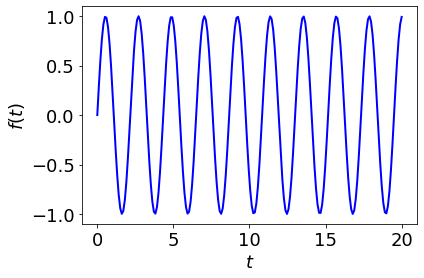

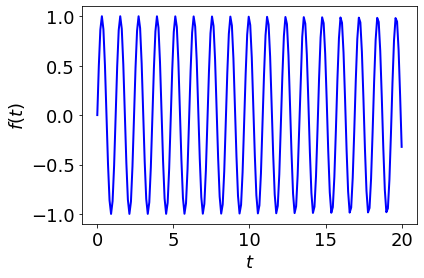

In [21]:
display(UI_box)   